![popcorn](images/popcorn.jpg)

# Data Analysis Notebook

In this notebook, we analyze the clean datasets in order to answer three primary questions:

- What movie genres generate the highest ROI?
- What time of year is best to release a movie?
- Which directors generate the highest grossings?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's load the clean files we saved previously.

In [2]:
#load clean data sets
title_budgets_df = pd.read_csv('data/cleaned_title_budgets_df.csv', index_col=0)
directors_df = pd.read_csv('data/cleaned_directors_df.csv', index_col=0)

In [3]:
title_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018


In [4]:
directors_df.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director


## Data Preparation

Before we start analyzing ROI, let's explore this column specifically and see if we need to do any further data preparation before proceeding.

In [5]:
title_budgets_df.shape

(2363, 12)

In [6]:
title_budgets_df['ROI'].describe()

count     2363.000000
mean       297.013840
std       1529.685748
min       -100.000000
25%        -63.744726
50%         66.608283
75%        270.525822
max      41556.474000
Name: ROI, dtype: float64

ROI has a standard deviation of ~1,500 and a maximum value of ~41,000. The mean of 297 is significantly higher than the median of 67. Looking at these statistics, we may need to eliminate outliers at the right end of our data.

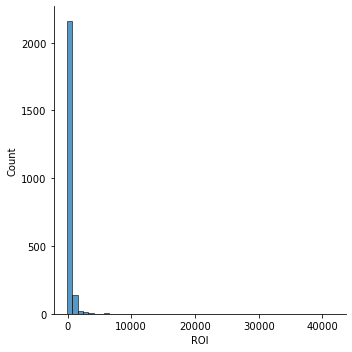

In [7]:
ax = sns.displot(data = title_budgets_df, x = 'ROI', bins=50);

The histogram confirms the data is skewed to the right. To make our analysis more useful, let's see what the data would look like eliminating all ROI values above 1000.

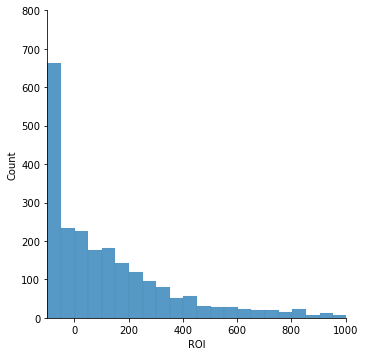

In [8]:
ax = sns.displot(data = title_budgets_df, x = 'ROI')
ax.set(ylim=(0,800), xlim=(-100,1000));

The data is still skewed right, but less so. We will create a new DataFrame eliminating all rows with ROI above 1000.

In [9]:
#create new dataframe of ROI values below 1000

filtered_title_budgets_df = title_budgets_df[title_budgets_df['ROI']<1000]
filtered_title_budgets_df.shape

(2233, 12)

By eliminating ROI values above 1000, our dataset went from 2363 rows to 2233 rows, so we have preserved most of our overall data. Now that we have a cleaner ROI data set to work with, let's use this filtered_title_budgets_df to answer some of our questions.

## Data Analysis

### What genre generates the highest ROI?

The first question we would like to explore is how genre relates to a movie's ROI. To do this, we need to group the movies into genres and plot against ROI.

In [10]:
# group movies by primary_genre in a new dataframe, and sort by ROI.

genres_ROI_df = filtered_title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
12,Musical,3.440000e+07,7.426199e+07,1.613299e+08,118.000000,196.739223,1998.750000
2,Animation,5.023810e+07,8.189104e+07,2.008475e+08,86.888889,186.337586,2009.095238
13,Mystery,2.862143e+07,5.647954e+07,1.167557e+08,109.000000,175.401714,2003.714286
18,War,5.200000e+07,6.191002e+07,1.439742e+08,96.000000,158.767495,1998.000000
1,Adventure,7.062279e+07,7.957017e+07,2.164096e+08,100.594595,153.875743,2011.880829
0,Action,7.089762e+07,7.606603e+07,2.056614e+08,110.246124,133.958724,2011.705128
4,Comedy,2.082407e+07,2.957628e+07,5.344359e+07,100.376923,129.074910,2011.120988
10,Horror,1.754722e+07,2.367712e+07,5.580318e+07,91.971429,120.543105,2009.269565
3,Biography,2.273332e+07,2.896282e+07,5.424894e+07,109.306569,120.485417,2012.152174
7,Drama,1.975041e+07,2.201243e+07,4.363710e+07,103.539171,104.197153,2008.878914


In [11]:
## create a function for setting a custom color palette that highlights the max value

def custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

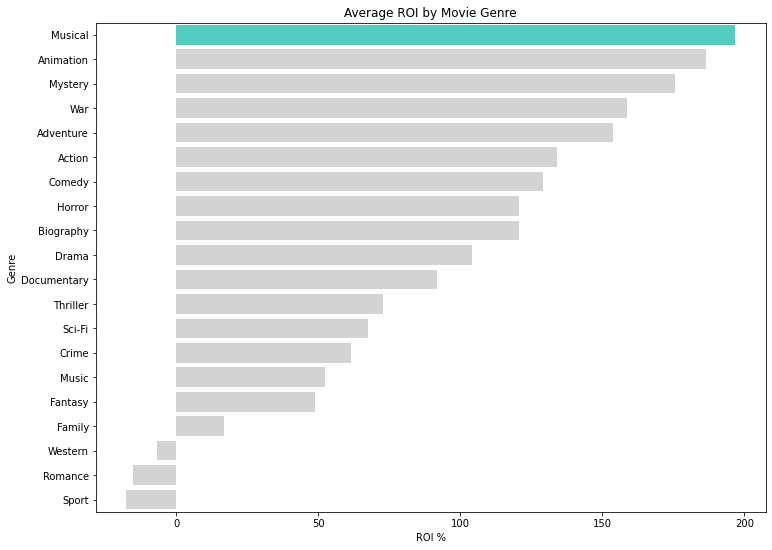

In [12]:
## plot average ROI by movie genre
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette=custom_palette(genres_ROI_df['ROI']))
ax.set_title('Average ROI by Movie Genre')
ax.set(xlabel='ROI %', ylabel= 'Genre');

It looks like musical is the movie genre with the highest return on investment. Let's investigate the data a little more to check if this is a logical conclusion.

In [13]:
filtered_title_budgets_df['primary_genre'].value_counts()

Action         546
Drama          479
Comedy         405
Adventure      193
Biography      138
Documentary    134
Crime          119
Horror         115
Thriller        30
Animation       21
Sci-Fi           9
Fantasy          8
Family           7
Mystery          7
Music            5
Romance          5
Musical          4
War              3
Western          3
Sport            2
Name: primary_genre, dtype: int64

In [14]:
filtered_title_budgets_df[filtered_title_budgets_df['primary_genre']=='Musical']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
461,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,534551353.0,tt10013634,150.0,Musical,462.685635,Musical,Mar,2015
3029,"Sep 8, 2006",The Covenant,20000000.0,23364784.0,38164784.0,tt3296724,99.0,Musical,90.823920,Musical,Sep,2006
3369,"Oct 22, 1964",My Fair Lady,17000000.0,72000000.0,72071636.0,tt10214520,NaN,Musical,323.950800,Musical,Oct,1964
4954,"Jul 16, 2010",Standing Ovation,5600000.0,531806.0,531806.0,tt1303803,105.0,Musical,-90.503464,Musical,Jul,2010


There are only 4 musical movies in our dataset, compared to action with over 500 movies. Two popular musical movies are skewing that genre's overall average. Due to this, let's also analyze the 10 genres that appear most frequently.

In [15]:
## add a count column to determine which genres appear most frequently, and sort by the new count column.

genres_ROI_df['count'] = filtered_title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
0,Action,7.089762e+07,7.606603e+07,2.056614e+08,110.246124,133.958724,2011.705128,546
7,Drama,1.975041e+07,2.201243e+07,4.363710e+07,103.539171,104.197153,2008.878914,479
4,Comedy,2.082407e+07,2.957628e+07,5.344359e+07,100.376923,129.074910,2011.120988,405
1,Adventure,7.062279e+07,7.957017e+07,2.164096e+08,100.594595,153.875743,2011.880829,193
3,Biography,2.273332e+07,2.896282e+07,5.424894e+07,109.306569,120.485417,2012.152174,138
6,Documentary,1.866346e+07,2.326170e+07,4.283025e+07,73.853659,91.651086,2005.985075,134
5,Crime,2.255991e+07,2.265247e+07,4.784907e+07,107.087719,61.427771,2009.882353,119
10,Horror,1.754722e+07,2.367712e+07,5.580318e+07,91.971429,120.543105,2009.269565,115
17,Thriller,1.805083e+07,1.764098e+07,3.192458e+07,88.526316,72.602335,2004.666667,30
2,Animation,5.023810e+07,8.189104e+07,2.008475e+08,86.888889,186.337586,2009.095238,21


In [16]:
# create a dataframe with just the top 10 genres, then sort by ROI.
frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

<ipython-input-16-9bb0e9121d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)


,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
2,Animation,5.023810e+07,8.189104e+07,2.008475e+08,86.888889,186.337586,2009.095238,21
1,Adventure,7.062279e+07,7.957017e+07,2.164096e+08,100.594595,153.875743,2011.880829,193
0,Action,7.089762e+07,7.606603e+07,2.056614e+08,110.246124,133.958724,2011.705128,546
4,Comedy,2.082407e+07,2.957628e+07,5.344359e+07,100.376923,129.074910,2011.120988,405
10,Horror,1.754722e+07,2.367712e+07,5.580318e+07,91.971429,120.543105,2009.269565,115
3,Biography,2.273332e+07,2.896282e+07,5.424894e+07,109.306569,120.485417,2012.152174,138
7,Drama,1.975041e+07,2.201243e+07,4.363710e+07,103.539171,104.197153,2008.878914,479
6,Documentary,1.866346e+07,2.326170e+07,4.283025e+07,73.853659,91.651086,2005.985075,134
17,Thriller,1.805083e+07,1.764098e+07,3.192458e+07,88.526316,72.602335,2004.666667,30
5,Crime,2.255991e+07,2.265247e+07,4.784907e+07,107.087719,61.427771,2009.882353,119


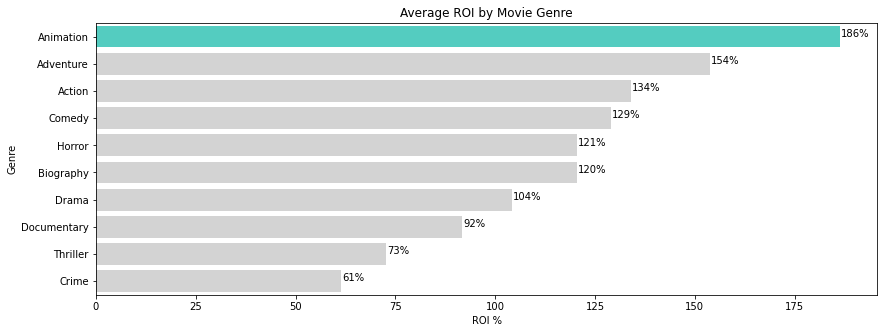

In [17]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette=custom_palette(frequent_genres_df['ROI']))
ax.set_title('Average ROI by Movie Genre')
ax.set_xlabel('ROI %')
ax.set_ylabel('Genre');

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '{:.0f}%'.format(width)) 
plt.savefig("images\ROI_by_genre.png")

Looking at the top 10 most frequent movie genres, animation films have the greatest ROI, followed closely by adventure films. How does this ranking compare to upfront investment required? 

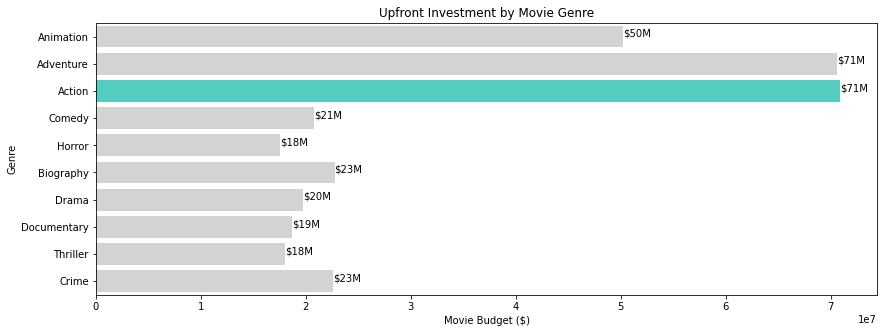

In [18]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x = 'production_budget', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette=custom_palette(frequent_genres_df['production_budget']))
ax.set_title('Upfront Investment by Movie Genre')
ax.set(xlabel='Movie Budget ($)', ylabel= 'Genre');

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}M'.format(width/1000000)) 


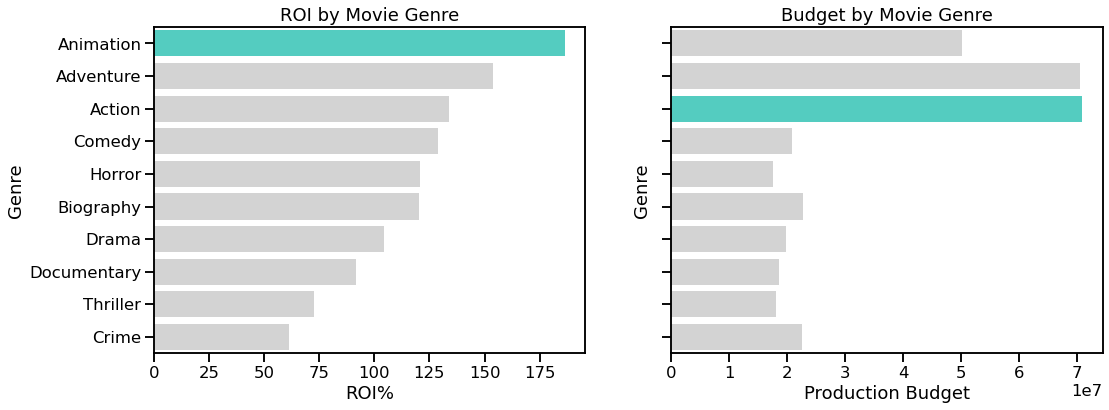

In [19]:
##Plot the two charts on the same figure
sns.set_context('talk')

fig, axes = plt.subplots(1,2, sharey=True, figsize=(17,6))
axes[0].set_title('ROI by Movie Genre')
axes[1].set_title('Budget by Movie Genre')

sns.barplot(ax=axes[0], x='ROI', y='primary_genre',
           data=frequent_genres_df, palette=custom_palette(frequent_genres_df['ROI']))

sns.barplot(ax=axes[1], x='production_budget', y='primary_genre',
           data=frequent_genres_df, palette=custom_palette(frequent_genres_df['production_budget']))

axes[0].set(xlabel='ROI%', ylabel='Genre')
axes[1].set(xlabel='Production Budget', ylabel='Genre')
axes[1].yaxis.labelpad = 20

plt.savefig("images\ROI_budget_genre.png");


Animation films require much less upfront investment than the other top ROI genres, adventure and action. Therefore, we recommend Microsoft's studio begin making animation films.

### When is the best time to release a movie?

Next, we are interested in learning more about how ROI and grossings are affected by release date of the film. Let's start by finding which release month is most profitable.

In [20]:
filtered_title_budgets_df['release_month'].value_counts()

Dec    281
Oct    213
Sep    202
Mar    194
Apr    193
Nov    187
Aug    185
Jun    173
Jul    162
Feb    153
May    153
Jan    137
Name: release_month, dtype: int64

In [21]:
# create a new column for month number to sort months in descending order.
filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


<ipython-input-21-26fb317ffb7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


In [22]:
# group the dataframe by release month

profit_by_month_df = filtered_title_budgets_df.groupby(['release_month']).mean().reset_index()
profit_by_month_df = profit_by_month_df.sort_values(by="month_num")
profit_by_month_df

,release_month,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
4,Jan,2.665979e+07,2.607239e+07,5.699968e+07,100.590551,131.055814,2010.255474,1.0
3,Feb,3.467601e+07,4.107264e+07,8.888308e+07,100.422535,135.274195,2011.111111,2.0
7,Mar,4.158466e+07,4.600126e+07,1.101162e+08,101.154696,114.344692,2011.422680,3.0
0,Apr,2.997036e+07,3.474844e+07,8.805171e+07,101.060773,106.933146,2010.056995,4.0
8,May,5.886036e+07,6.832174e+07,1.789549e+08,103.486111,137.444647,2010.392157,5.0
6,Jun,5.480337e+07,7.344582e+07,1.780253e+08,103.809816,170.283519,2009.716763,6.0
5,Jul,4.767664e+07,5.277144e+07,1.340785e+08,103.283871,142.609930,2010.049383,7.0
1,Aug,2.882443e+07,3.357010e+07,6.864263e+07,98.265537,109.262480,2009.513514,8.0
11,Sep,2.482633e+07,2.439002e+07,5.248047e+07,101.234973,100.897507,2010.435644,9.0
10,Oct,2.531096e+07,2.436971e+07,5.774825e+07,102.283582,89.766404,2009.469484,10.0


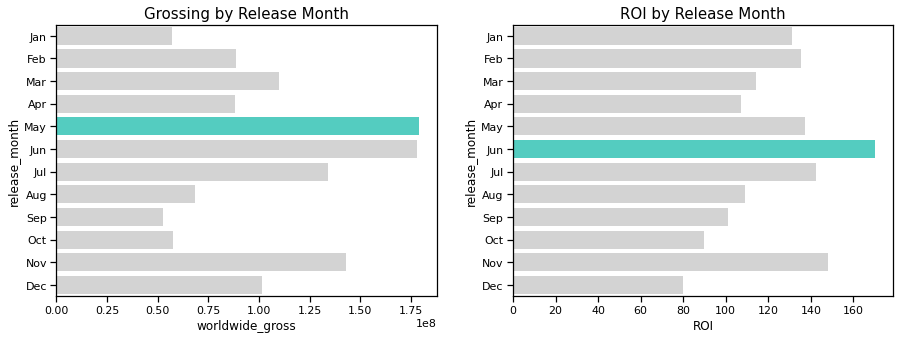

In [23]:
sns.set_context("notebook")
data = profit_by_month_df.sort_values(by = 'month_num')

fig, axes = plt.subplots(1,2, sharey=False, figsize=(15,5))
axes[0].set_title('Grossing by Release Month', fontsize=15)
axes[1].set_title('ROI by Release Month', fontsize=15)

sns.barplot(ax=axes[0], x='worldwide_gross', y='release_month',
           data=data, palette=custom_palette(profit_by_month_df['worldwide_gross']))

sns.barplot(ax=axes[1], x='ROI', y='release_month',
           data=data, palette=custom_palette(profit_by_month_df['ROI']));

Based on this analysis, it looks like the movie release month with the best worldwide grossing is May, and the month with the best ROI is June. What if we look at ROI based on the quarter of release?

In [24]:
## Create a new column for quarter.
def quarter_released(month):
    if (month <=3):
        return 'Q1'
    elif(month <=6):
        return 'Q2'
    elif(month <=9):
        return 'Q3'
    else:
        return 'Q4'


In [25]:
filtered_title_budgets_df['quarter_released'] = filtered_title_budgets_df['month_num'].apply(quarter_released)
filtered_title_budgets_df.head()

<ipython-input-25-c37ab5f8ea64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df['quarter_released'] = filtered_title_budgets_df['month_num'].apply(quarter_released)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009,12,Q4
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011,5,Q2
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019,6,Q2
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015,5,Q2
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018,4,Q2


In [26]:
profit_by_quarter_df = filtered_title_budgets_df.groupby(['quarter_released']).mean().reset_index()
profit_by_quarter_df = profit_by_quarter_df.sort_values(by="quarter_released")
profit_by_quarter_df

,quarter_released,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
0,Q1,3.517613e+07,3.880222e+07,8.836903e+07,100.764444,125.691051,2010.993802,2.117769
1,Q2,4.676473e+07,5.754490e+07,1.448409e+08,102.694672,137.044657,2010.042389,4.961464
2,Q3,3.291631e+07,3.585834e+07,8.200484e+07,100.831068,116.024889,2010.010929,8.072860
3,Q4,3.533624e+07,4.038942e+07,9.929359e+07,103.848485,101.721982,2009.903084,11.099853


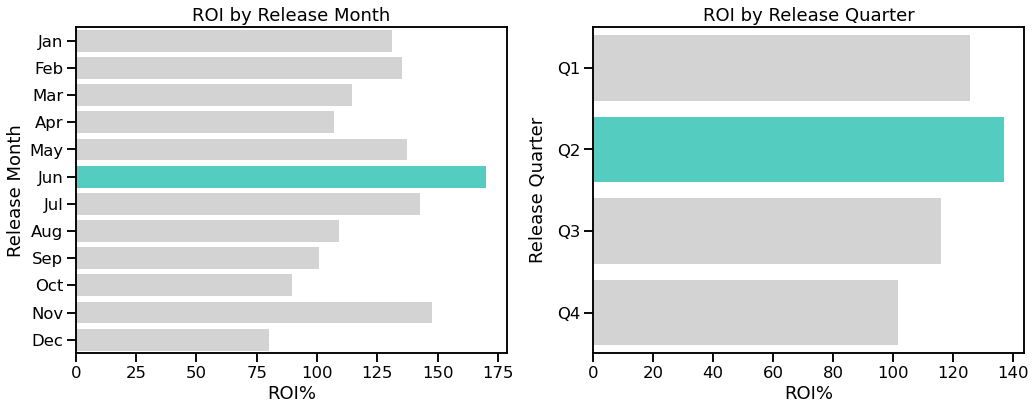

In [27]:
sns.set_context("talk")
fig, axes = plt.subplots(1,2, sharey=False, figsize=(17,6))
axes[0].set_title('ROI by Release Month')
axes[1].set_title('ROI by Release Quarter')

sns.barplot(ax=axes[0], x='ROI', y='release_month',
           data=profit_by_month_df, palette=custom_palette(profit_by_month_df['ROI']))

sns.barplot(ax=axes[1], x='ROI', y='quarter_released',
           data=profit_by_quarter_df, palette=custom_palette(profit_by_quarter_df['ROI']))

axes[0].set(xlabel='ROI%', ylabel='Release Month')
axes[1].set(xlabel='ROI%', ylabel='Release Quarter')
axes[1].yaxis.labelpad = 10

plt.savefig("images\ROI_by_release.png");

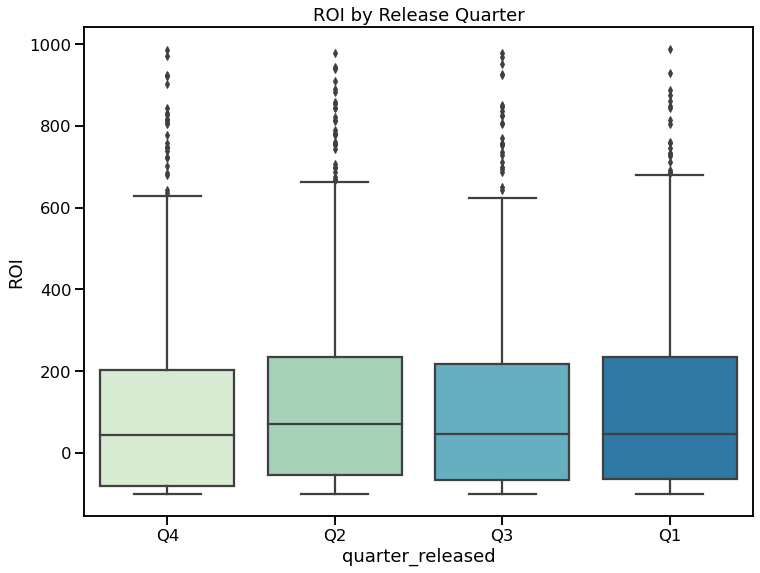

In [28]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=filtered_title_budgets_df, x='quarter_released', y='ROI', palette='GnBu')
ax.set_title('ROI by Release Quarter');

Based on our analysis, Q2 has the highest average ROI per quarter. This could make sense, since new movies released at this time can take advantage of summer vacation audiences.

### Who are the highest grossing directors?

In order to figure out which directors brought in the most money, we will need to merge our two dataframes, directors_df and title_budgets_df.

In [29]:
## merge directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(filtered_title_budgets_df, 
                                                how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146436,nm9971456,Zheng Wei,director,NaN,tt8697720,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146437,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146438,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146439,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
directors_title_budgets_df.isna().sum()

nconst                     0
primary_name               0
primary_profession       587
known_for_titles        4207
tconst                     0
ordering                   0
category                   0
release_date          144123
movie                 144123
production_budget     144123
domestic_gross        144123
worldwide_gross       144123
runtime_minutes       144276
genres                144123
ROI                   144123
primary_genre         144123
release_month         144123
release_year          144123
month_num             144123
quarter_released      144123
dtype: int64

We can see there were 144,000 values in the directors_df that weren't able to match to a film in title_budgets_df. Let's drop all rows with missing values for worldwide_gross, since they won't be helpful for our analysis.

In [31]:
directors_title_budgets_df.dropna(subset=['worldwide_gross'], inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
40,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt2023453,5.0,director,"Aug 3, 2012",Diary of a Wimpy Kid: Dog Days,22000000.0,49008662.0,77229695.0,94.0,"Comedy,Family",251.044068,Comedy,Aug,2012.0,8.0,Q3
41,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt1650043,5.0,director,"Mar 25, 2011",Diary of a Wimpy Kid: Rodrick Rules,18000000.0,52698535.0,73695194.0,99.0,"Comedy,Family",309.417744,Comedy,Mar,2011.0,3.0,Q1
42,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt6003368,5.0,director,"May 19, 2017",Diary of a Wimpy Kid: The Long Haul,22000000.0,20738724.0,35609577.0,91.0,"Comedy,Family",61.861714,Comedy,May,2017.0,5.0,Q2
45,nm0103187,Dan Bradley,"stunts,assistant_director,actor","tt0244244,tt0440963,tt1229238,tt0372183",tt1234719,5.0,director,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,48164150.0,93.0,"Action,Sci-Fi,Thriller",-25.901308,Action,Nov,2012.0,11.0,Q4
77,nm0135952,Nae Caranfil,"writer,director,actor","tt0839967,tt2017486,tt0314067,tt0175575",tt2017486,5.0,director,"Apr 17, 2014",Closer to the Moon,1500000.0,0.0,5396.0,112.0,"Comedy,Crime,Drama",-99.640267,Comedy,Apr,2014.0,4.0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143755,nm5862289,M.S. Sreenath,director,tt3107798,tt3107798,5.0,director,"Jan 25, 2008",Rambo,47500000.0,42754105.0,112214531.0,144.0,"Comedy,Drama,Thriller",136.241118,Comedy,Jan,2008.0,1.0,Q1
145765,nm6854035,DeShawn Hill,"writer,producer,director","tt9159980,tt5340764,tt5294776,tt9159890",tt5294776,5.0,director,"Nov 9, 2007",Holly,3000000.0,163069.0,163069.0,NaN,"Action,Crime,Thriller",-94.564367,Action,Nov,2007.0,11.0,Q4
145838,nm7372429,Andrius Blazevicius,"writer,director,editor","tt9348578,tt5846676,tt4744442,tt4738604",tt5846676,5.0,director,"Apr 4, 1997",The Saint,90000000.0,61363304.0,169400000.0,96.0,Drama,88.222222,Drama,Apr,1997.0,4.0,Q2
146300,nm9107499,Musing Derick Tenn,director,tt7097350,tt7097350,1.0,director,"Apr 21, 1995",Kiss of Death,40000000.0,14942422.0,14942422.0,124.0,"Comedy,Drama",-62.643945,Comedy,Apr,1995.0,4.0,Q2


Now that we have directors and their movie information in one place, there are two different ways of looking at the data. One way is to sort the DataFrame by worldwide_gross, and see who the directors are of the top movies. Or we can group the dataframe by director, and sum worldwide_gross to see which directors have made the most money overall.

**Method 1: Top Grossing Movies and their directors**

In [32]:
# sort dataFrame by worldwide_gross

directors_title_budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
91051,nm3786927,Atsushi Wada,director,"tt1594549,tt1775309,tt1602612",tt1775309,5.0,director,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,553.257713,Horror,Dec,2009.0,12.0,Q4
15487,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,5.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,6.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
25271,nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,124.0,"Action,Adventure,Sci-Fi",666.909239,Action,Jun,2015.0,6.0,Q2
36978,nm1490123,James Wan,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852",tt2820852,5.0,director,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,137.0,"Action,Crime,Thriller",699.327786,Action,Apr,2015.0,4.0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,nm0261140,Barrett Esposito,"director,writer,producer","tt0274675,tt7700702,tt1460798",tt1460798,5.0,director,"Aug 18, 2014",Henry & Me,5000000.0,0.0,0.000000e+00,67.0,"Animation,Family",-100.000000,Animation,Aug,2014.0,8.0,Q3
97905,nm4150722,Chris Petropoulos,"director,writer,cinematographer",tt1764615,tt1764615,3.0,director,"Mar 10, 2015",Subconscious,500000.0,0.0,0.000000e+00,72.0,Horror,-100.000000,Horror,Mar,2015.0,3.0,Q1
57136,nm2525426,Daniel Garcia,"editor,writer,cinematographer","tt1822322,tt9080672,tt2449606,tt3666210",tt3666210,6.0,director,"Dec 31, 2014",H.,200000.0,0.0,0.000000e+00,93.0,"Drama,Sci-Fi,Thriller",-100.000000,Drama,Dec,2014.0,12.0,Q4
4967,nm0684879,Brett Piper,"special_effects,writer,director","tt0272202,tt2319456,tt0370295,tt0102569",tt2319456,5.0,director,"Sep 29, 2015",Queen Crab,75000.0,0.0,0.000000e+00,80.0,"Action,Sci-Fi,Thriller",-100.000000,Action,Sep,2015.0,9.0,Q3


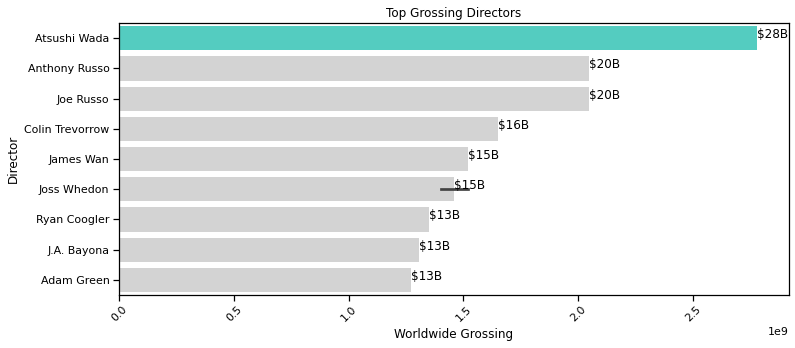

In [33]:
# plot worldwide_gross by top 10 directors
sns.set_context("notebook")
plt.figure(figsize=(12,5))
ax =sns.barplot(x = 'worldwide_gross', y = 'primary_name', 
            data = directors_title_budgets_df[0:10], 
            palette = custom_palette(directors_title_budgets_df['worldwide_gross']))

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}B'.format(width/100000000)) 

ax.set_title('Top Grossing Directors')
ax.set(xlabel='Worldwide Grossing', ylabel= 'Director')
plt.xticks(rotation=45);

**Method 2: Top 10 Grossing Directors Overall**

In [34]:
sorted_directors_df = directors_title_budgets_df.groupby(['primary_name']).sum().reset_index()
sorted_directors_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
sorted_directors_df

,primary_name,ordering,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
106,Anthony Russo,15.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0,13.0
753,Joe Russo,18.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0,13.0
287,Christopher Nolan,20.0,750000000.0,1.118801e+09,3.086180e+09,587.0,1253.635592,8053.0,32.0
848,Joss Whedon,15.0,615600000.0,1.105671e+09,2.969535e+09,427.0,879.998009,6025.0,18.0
1288,Peter Jackson,15.0,750000000.0,8.164902e+08,2.922948e+09,474.0,869.179218,6039.0,36.0
...,...,...,...,...,...,...,...,...,...
1637,Timothy A. Chey,5.0,1200000.0,0.000000e+00,0.000000e+00,0.0,-100.000000,2017.0,12.0
1110,Michael Mongillo,5.0,2660000.0,0.000000e+00,0.000000e+00,82.0,-100.000000,1956.0,1.0
306,Corey Grant,5.0,1800000.0,0.000000e+00,0.000000e+00,111.0,-100.000000,2012.0,2.0
1107,Michael Hoffman Jr.,5.0,500000.0,0.000000e+00,0.000000e+00,104.0,-100.000000,2012.0,7.0


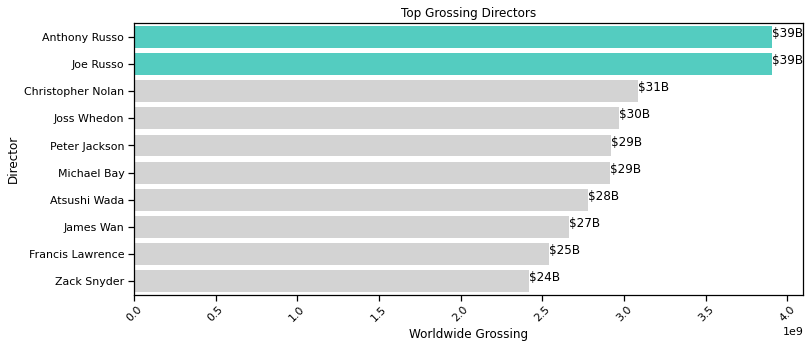

In [35]:
top_10_directors = sorted_directors_df[0:10]
plt.figure(figsize=(12,5))
ax = sns.barplot(x = 'worldwide_gross', y = 'primary_name', 
                 data = top_10_directors, 
                 palette = custom_palette(top_10_directors['worldwide_gross']))

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}B'.format(width/100000000)) 


ax.set_title('Top Grossing Directors')
ax.set(xlabel='Worldwide Grossing', ylabel= 'Director')
plt.xticks(rotation=45)
plt.savefig("images/top_directors.png");

We recommend Microsoft uses Anthony and Joe Russo or Christopher Nolan to direct its films.

Now let's also look at what movies Anthony Russo, Joe Russo and Christopher Nolan have directed.

In [36]:
directors_title_budgets_df[directors_title_budgets_df['primary_name'].isin(['Christopher Nolan', 'Anthony Russo', 'Joe Russo'])]

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
15487,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,5.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,6.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
15485,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt3498820,5.0,director,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,147.0,"Action,Adventure,Sci-Fi",356.027765,Action,May,2016.0,5.0,Q2
975,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt3498820,6.0,director,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,147.0,"Action,Adventure,Sci-Fi",356.027765,Action,May,2016.0,5.0,Q2
2741,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt1345836,5.0,director,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,164.0,"Action,Thriller",294.341491,Action,Jul,2012.0,7.0,Q3
2740,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt1375666,5.0,director,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08,148.0,"Action,Adventure,Sci-Fi",422.202901,Action,Jul,2010.0,7.0,Q3
15484,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt1843866,5.0,director,"Apr 4, 2014",Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,136.0,"Action,Adventure,Sci-Fi",320.236405,Action,Apr,2014.0,4.0,Q2
974,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt1843866,6.0,director,"Apr 4, 2014",Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,136.0,"Action,Adventure,Sci-Fi",320.236405,Action,Apr,2014.0,4.0,Q2
2742,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt0816692,5.0,director,"Nov 5, 2014",Interstellar,165000000.0,188017894.0,6.663794e+08,169.0,"Adventure,Drama,Sci-Fi",303.866288,Adventure,Nov,2014.0,11.0,Q4
2743,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt5013056,5.0,director,"Jul 21, 2017",Dunkirk,150000000.0,190068280.0,4.998374e+08,106.0,"Action,Drama,History",233.224912,Action,Jul,2017.0,7.0,Q3


These directors mainly direct action films. What if Microsoft begins by making animation movies per our recommendation? Who should they use to direct that type of film genre?

In [37]:
animation_directors_df = directors_title_budgets_df[directors_title_budgets_df['primary_genre']=='Animation']
animation_directors_df = animation_directors_df.groupby(['primary_name']).sum().reset_index()
animation_directors_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)

In [38]:
animation_directors_df

,primary_name,ordering,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
17,Kevin Johnson,4.0,202000000.0,408344079.0,1.007198e+09,128.0,514.435769,4010.0,16.0
16,Jun Falkenstein,2.0,202000000.0,408344079.0,1.007198e+09,128.0,514.435769,4010.0,16.0
10,Genndy Tartakovsky,10.0,165000000.0,318013158.0,8.480061e+08,180.0,832.176328,4027.0,18.0
4,Christophe Lourdelet,5.0,75000000.0,270329045.0,6.344548e+08,108.0,745.939719,2016.0,12.0
9,Garth Jennings,6.0,75000000.0,270329045.0,6.344548e+08,108.0,745.939719,2016.0,12.0
3,Chris Renaud,6.0,69000000.0,251513985.0,5.434646e+08,95.0,687.629816,2010.0,7.0
20,Pierre Coffin,5.0,69000000.0,251513985.0,5.434646e+08,95.0,687.629816,2010.0,7.0
14,Jason Stamp,1.0,127500000.0,137748063.0,3.561481e+08,77.0,179.331814,2000.0,5.0
24,The Tilford Brothers,2.0,127500000.0,137748063.0,3.561481e+08,77.0,179.331814,2000.0,5.0
1,Bill Boyce,5.0,130000000.0,101200044.0,3.528311e+08,0.0,171.408512,2014.0,3.0


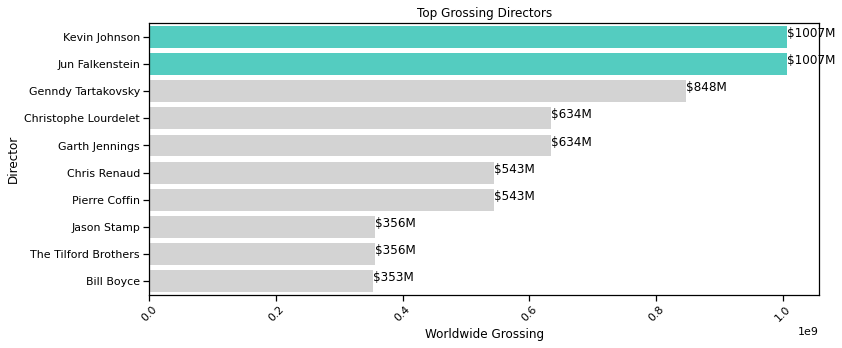

In [39]:
# make a graph of top animation directors


plt.figure(figsize=(12,5))
ax = sns.barplot(x = 'worldwide_gross', y = 'primary_name', 
                 data = animation_directors_df[0:10], 
                 palette = custom_palette(animation_directors_df['worldwide_gross']))

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}M'.format(width/1000000)) 


ax.set_title('Top Grossing Directors')
ax.set(ylabel='Director', xlabel= 'Worldwide Grossing')
plt.xticks(rotation=45)
plt.savefig("images/top_animation_directors.png");

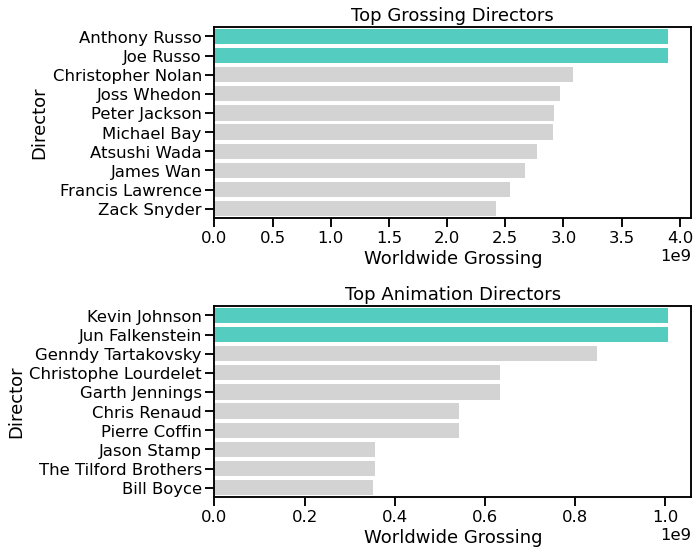

In [40]:
## Plot top directors and top animation directors on the same figure

sns.set_context("talk")
fig, axes = plt.subplots(2,1, sharex=False, figsize=(10,8))
axes[0].set_title('Top Grossing Directors')
axes[1].set_title('Top Animation Directors')

sns.barplot(ax=axes[0], x = 'worldwide_gross', y = 'primary_name', 
                 data = top_10_directors, 
                 palette = custom_palette(top_10_directors['worldwide_gross']))


sns.barplot(ax=axes[1], x = 'worldwide_gross', y = 'primary_name', 
                 data = animation_directors_df[0:10], 
                 palette = custom_palette(animation_directors_df['worldwide_gross']))

for ax in axes:
    ax.set(xlabel='Worldwide Grossing', ylabel='Director')

fig.tight_layout(pad=1)

plt.savefig("images\directors_by_grossing.png");


Microsoft should hire Kevin Johnson or Jun Falkenstein to direct its animation films.

### Bonus Question: How does movie length affect ROI?

Another question we had was how movie length affects our profitability. Let's use a regression plot to see if we can quickly see a relationship between ROI and runtime_minutes.

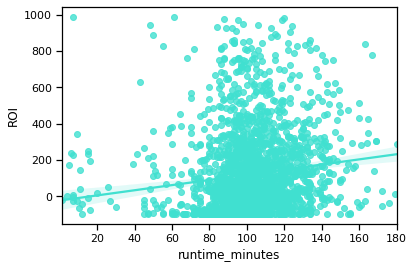

In [41]:
##plot runtime_minutes against ROI
sns.set_context('notebook')
ax = sns.regplot(data=filtered_title_budgets_df, x='runtime_minutes', y='ROI', color='turquoise');

The plot suggests there is a slightly positive correlation between runtime minutes and ROI. Let's see what happens if we run the same analysis after breaking run time into categories. We will run the describe method to see how we should break down our run time categories.

In [42]:
# run .describe() to determine categories of runtime_minutes data

filtered_title_budgets_df['runtime_minutes'].describe()

count    2080.000000
mean      102.163462
std        21.594768
min         1.000000
25%        91.000000
50%       101.000000
75%       114.000000
max       180.000000
Name: runtime_minutes, dtype: float64

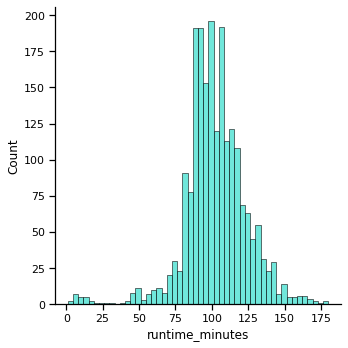

In [43]:
ax = sns.displot(data = filtered_title_budgets_df, x = 'runtime_minutes', color='turquoise');

Based on the 25%-75% quartiles, we will categorize normal movie lengths as between 90 and 115 minutes. Anything shorter than 90 minutes will be categorized as 'short' and anything longer than 115 minutes will be categorized as 'long.

In [44]:
# create a function that categorizes each movie into movie lengths.

def movie_length_type(minutes):
    if (minutes < 90):
        return 'short'
    elif (minutes> 115):
        return 'long'
    else:
        return 'normal'

In [45]:
filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)
filtered_title_budgets_df.head()

<ipython-input-45-fa03b4f16aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released,movie_length
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009,12,Q4,normal
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011,5,Q2,long
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019,6,Q2,normal
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015,5,Q2,long
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018,4,Q2,long


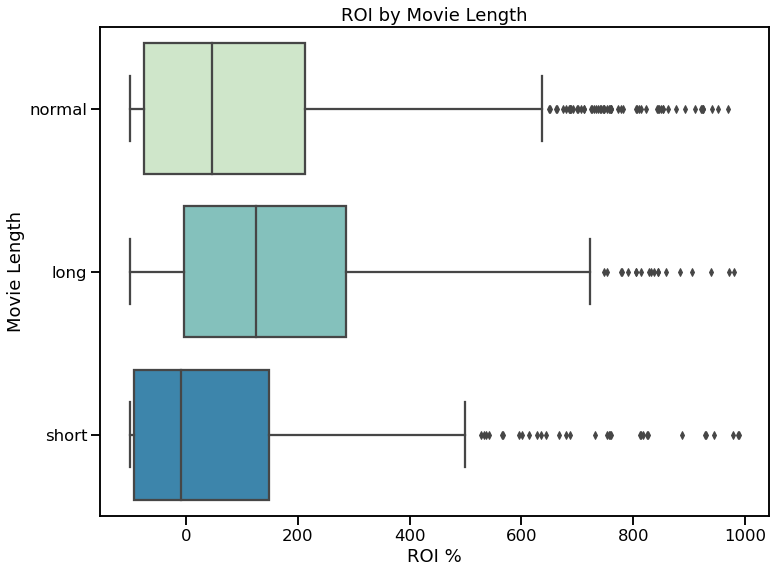

In [46]:
sns.set_context("talk")
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=filtered_title_budgets_df, x='ROI', y='movie_length', palette = 'GnBu')
ax.set_title('ROI by Movie Length')
ax.set(xlabel = 'ROI %', ylabel='Movie Length')
plt.savefig("images/movie_length_box");

In general, it looks like long movies perform slightly better from an ROI perspective.